## 8.1 - PDEs 3: Relaxation Methods 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Exercise 1: Analytic soln to electrostatic potential using separation of variables: 

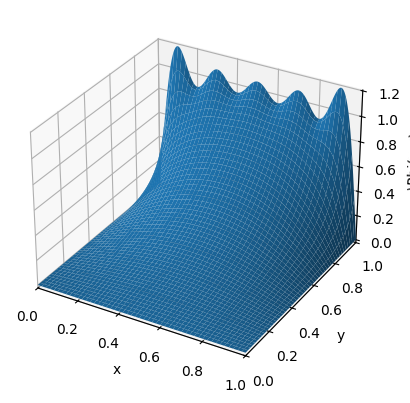

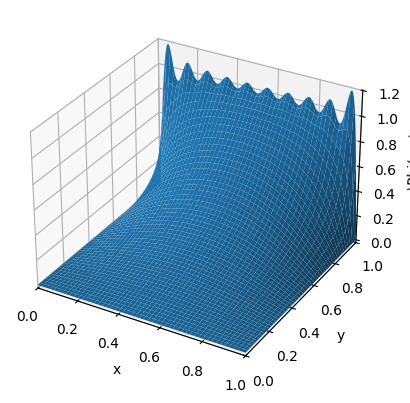

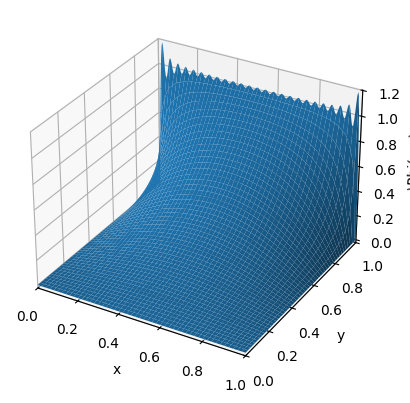

In [3]:
L = 1
npoints = 300
es0 = 1
x = np.linspace(0,L,npoints)
y = np.linspace(0,L,npoints)
   
nlist = [11,21,51]  

def plot_funct(x,y,esp):
    xp,yp = np.meshgrid(x,y)
    fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
    ax.plot_surface(xp,yp,esp)
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(r'\Phi(x,y)')
    plt.show()

def analytic_esp(es0, x , y, L, nvals, npoints):
    es = np.zeros((npoints,npoints))
    for n in np.arange(1,nvals,2):
        for i,j in enumerate(y):  
            es[i,:] += (4/(np.pi*n)) * np.sin(n*np.pi*x/L) * ((np.sinh(n*np.pi*j/L))/(np.sinh(n*np.pi*L/L)))
        es = es0 * es
    return es

for nvals in nlist:
    es  = analytic_esp(es0, x, y, L,nvals,npoints)
    plot_funct(x,y,es)
    



Observe 'Gibbs Phenomenon' near the boundary $y=L_y$, an oscillation that commonly occurs when a Fourier series is used to represent a discontinuos function.
A large no. of terms are required to represent soln near this boundary accurately.

After 10 iterations, fractional change = 0.0014391186689641355
After 20 iterations, fractional change = 0.0008725968144032887
After 30 iterations, fractional change = 0.0006371712578985949
After 40 iterations, fractional change = 0.0005028389203036478
After 50 iterations, fractional change = 0.00041437251349109696
After 60 iterations, fractional change = 0.00035126471994347626
After 70 iterations, fractional change = 0.0003033126772273378
After 80 iterations, fractional change = 0.0002654764701562929
After 90 iterations, fractional change = 0.00023485715414883095
After 100 iterations, fractional change = 0.0002096279541035761
After 110 iterations, fractional change = 0.00018837801852546133
After 120 iterations, fractional change = 0.0001702164058463862
After 130 iterations, fractional change = 0.0001547262929116453
After 140 iterations, fractional change = 0.0001412433440257849
After 150 iterations, fractional change = 0.00012938463075964354
After 160 iterations, fractional change = 0.

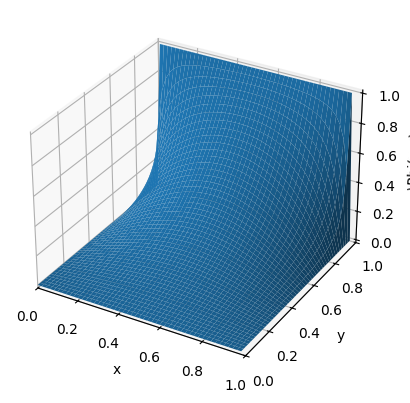

In [4]:
# intialise params
L = 1
N = 50
h = L/N
x = np.arange(N) * h
y = np.arange(N) * h

Method = 'Jacobi'       # 'Jacobi', 'GS', 'SOR
if Method == 'SOR':
    omega_opt = 2 / (1 + np.sin(np.pi/N))
    print(f'Optimal value for overrelaxation parameter is {omega_opt}')
omega = 1.8

# Initial guess using analytic soln
esp0 = 1
n = 2       # only use first term, set 2 two because of way function builds array of n values
esp = analytic_esp(esp0,x,y,L,n,N)
# BCs
esp[0,:] = 0
esp[-1,:] = esp0 * np.ones(N)
esp[:,0] = 0
esp[:,-1] = 0

# Main loop
max_iters = N**2
change = np.empty(max_iters)
changeDesired = 1.e-4
esp_new = np.copy(esp)

for iter in range(max_iters):
    changesum = 0 

    if Method == 'Jacobi':
        for i in range(1,N-1):      # loop over interior points only (observe BCs)
            for j in range(1,N-1):
                esp_new[i,j] = 0.25 * (esp[i+1,j] + esp[i-1,j] + esp[i,j+1] + esp[i,j-1])
                changesum += abs(1 - esp[i,j]/esp_new[i,j])
        esp = np.copy(esp_new)

    if Method == 'GS':
        for i in range(1,N-1):
            for j in range(1,N-1):
                esp_new[i,j] = 0.25 * (esp[i+1,j] + esp_new[i-1,j] + esp[i,j+1] + esp_new[i,j-1])      # uses updated values as they become available
                changesum += abs(1 - esp[i,j]/esp_new[i,j])
        esp = np.copy(esp_new)
        
    if Method == 'SOR':
        for i in range(1,N-1):
            for j in range(1,N-1):
                esp_new[i,j] = (1-omega)*esp[i,j] + 0.25*omega * (esp[i+1,j] + esp_new[i-1,j] + esp[i,j+1] + esp_new[i,j-1])        # Uses overrelaxation parameter w to accelerate convergence
                changesum += abs(1 - esp[i,j]/esp_new[i,j])
        esp = np.copy(esp_new)

    change[iter] = changesum/(N)**2       # average change for NxN grid points
    if (iter+1) % 10 == 0:
        print(f'After {iter+1} iterations, fractional change = {change[iter]}')  
    
    if change[iter] < changeDesired:
        print(f'Desired accurracy achieved after {iter+1} iterations')
        break


# SUrface Plot:
plot_funct(x, y, esp)
plt.show()

**Speed comparison:**
Using first term of analytic soln as initial guess,
- Jacobi - 183 iterations
- Gauss-Siedel - 160 iterations
- Simultaneous Overrelaxation - 98 iterations

## Exercise (4) - Speed analysis:
* Run the program for different sized systems ($N_x = N_y = 10$ to $50$)

In [5]:
def main_loop_esp(N, esp, changeDesired, omega=1, Method='SOR', do_print=True):
    esp_new = np.copy(esp)
    max_iters = N**2 + 100
    change = np.empty(max_iters)
    for iter in range(max_iters):
        changesum = 0 

        if Method == 'Jacobi':
            for i in range(1,N-1):      # loop over interior points only (observe BCs)
                for j in range(1,N-1):
                    esp_new[i,j] = 0.25 * (esp[i+1,j] + esp[i-1,j] + esp[i,j+1] + esp[i,j-1])
                    changesum += abs(1 - esp[i,j]/esp_new[i,j])
            esp = np.copy(esp_new)
            
        if Method == 'SOR':
            for i in range(1,N-1):
                for j in range(1,N-1):
                    esp_new[i,j] = (1-omega)*esp[i,j] + 0.25*omega * (esp[i+1,j] + esp_new[i-1,j] + esp[i,j+1] + esp_new[i,j-1])        # Uses overrelaxation parameter w to accelerate convergence
                    changesum += abs(1 - esp[i,j]/esp_new[i,j])
            esp = np.copy(esp_new)

        change[iter] = changesum/(N)**2       # average change for NxN grid points
        if do_print == True:
            if (iter+1) % 10 == 0:
                print(f'After {iter+1} iterations, fractional change = {change[iter]}')  
        
        if change[iter] < changeDesired:
            total_iters = iter+1
            print(f'Desired accuracy achieved after {total_iters} iterations for grid size {N}x{N}')
            return esp, total_iters
    return print('Did not converge within max allowable iterations')

Desired accuracy achieved after 77 iterations for grid size 10x10
Desired accuracy achieved after 89 iterations for grid size 11x11
Desired accuracy achieved after 103 iterations for grid size 12x12
Desired accuracy achieved after 116 iterations for grid size 13x13
Desired accuracy achieved after 129 iterations for grid size 14x14
Desired accuracy achieved after 142 iterations for grid size 15x15
Desired accuracy achieved after 154 iterations for grid size 16x16
Desired accuracy achieved after 166 iterations for grid size 17x17
Desired accuracy achieved after 178 iterations for grid size 18x18
Desired accuracy achieved after 189 iterations for grid size 19x19
Desired accuracy achieved after 199 iterations for grid size 20x20
Desired accuracy achieved after 209 iterations for grid size 21x21
Desired accuracy achieved after 217 iterations for grid size 22x22
Desired accuracy achieved after 224 iterations for grid size 23x23
Desired accuracy achieved after 229 iterations for grid size 24x

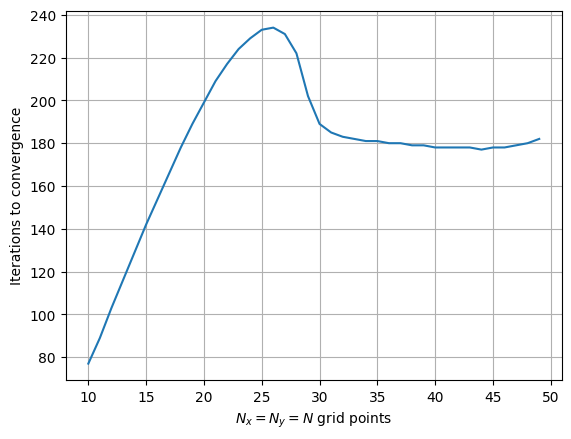

In [6]:
# intialise params
L = 1
changeDesired = 1.e-4

Method = 'Jacobi'       # 'Jacobi', 'GS', 'SOR
if Method == 'SOR':
    omega_opt = 2 / (1 + np.sin(np.pi/N))
    print(f'Optimal value for overrelaxation parameter is {omega_opt}')
omega = 1.8

# loop through esp function
N_range = np.arange(10,50,1)
iterPlot = np.empty(len(N_range))

for i,N in enumerate(N_range):
    # set params
    h = L/N
    x = np.arange(N) * h
    y = np.arange(N) * h
    esp0 = 1
    n = 2       # only use first term, set 2 two because of way function builds array of n values   
    esp = analytic_esp(esp0,x,y,L,n,N)
    # BCs
    esp[0,:] = 0
    esp[-1,:] = esp0 * np.ones(N)
    esp[:,0] = 0
    esp[:,-1] = 0
    # call function
    esp, total_iters = main_loop_esp(N, esp, changeDesired, Method='Jacobi', do_print=False)
    iterPlot[i] = total_iters
    # plot_funct(x,y,esp)

plt.plot(N_range, iterPlot)
plt.xlabel('$N_x = N_y = N$ grid points')
plt.ylabel('Iterations to convergence')
plt.grid()
plt.show()


Cant fit a power law to this with any accuracy. I assume this non-montonic behaviour is due to the initial being less accurate for smaller grid size. 

Try for intial guess of $\Phi_0 = 0.02$ on interior:

Desired accuracy achieved after 105 iterations for grid size 10x10
Desired accuracy achieved after 149 iterations for grid size 12x12
Desired accuracy achieved after 200 iterations for grid size 14x14
Desired accuracy achieved after 256 iterations for grid size 16x16
Desired accuracy achieved after 316 iterations for grid size 18x18
Desired accuracy achieved after 381 iterations for grid size 20x20
Desired accuracy achieved after 450 iterations for grid size 22x22
Desired accuracy achieved after 522 iterations for grid size 24x24
Desired accuracy achieved after 598 iterations for grid size 26x26
Desired accuracy achieved after 677 iterations for grid size 28x28
Desired accuracy achieved after 759 iterations for grid size 30x30
Desired accuracy achieved after 844 iterations for grid size 32x32
Desired accuracy achieved after 932 iterations for grid size 34x34
Desired accuracy achieved after 1022 iterations for grid size 36x36
Desired accuracy achieved after 1114 iterations for grid size

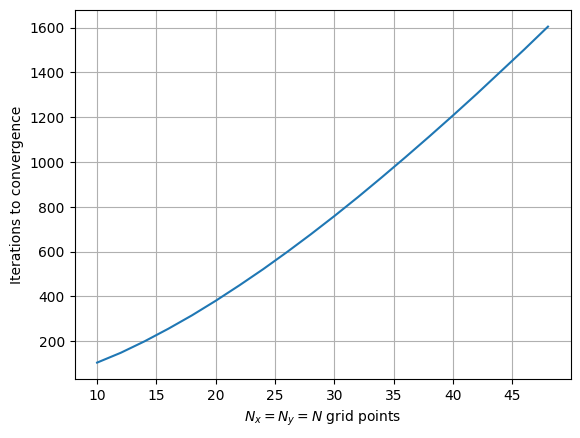

In [7]:
# intialise params
L = 1
changeDesired = 1.e-4

Method = 'Jacobi'       # 'Jacobi', 'GS', 'SOR
if Method == 'SOR':
    omega_opt = 2 / (1 + np.sin(np.pi/N))
    print(f'Optimal value for overrelaxation parameter is {omega_opt}')
omega = 1.8

# loop through esp function
N_range = np.arange(10,50,2)
iterPlot = np.empty(len(N_range))

for i,N in enumerate(N_range):
    # set params
    h = L/N
    x = np.arange(N) * h
    y = np.arange(N) * h
    esp0 = 1
    n = 2       # only use first term, set 2 two because of way function builds array of n values   
    esp = np.ones((N,N))*1e-2
    # BCs
    esp[0,:] = 0
    esp[-1,:] = esp0 * np.ones(N)
    esp[:,0] = 0
    esp[:,-1] = 0
    # call function
    esp, total_iters = main_loop_esp(N, esp, changeDesired, Method='Jacobi', do_print=False)
    iterPlot[i] = total_iters
    # plot_funct(x,y,esp)

plt.plot(N_range, iterPlot)
plt.xlabel('$N_x = N_y = N$ grid points')
plt.ylabel('Iterations to convergence')
plt.grid()
plt.show()


Fit Power Law:

Power law exponent approximated as b = 1.9575865313853444


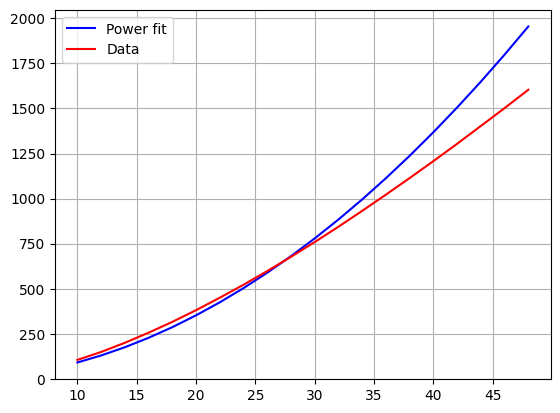

In [261]:
b = np.mean(np.log(iterPlot)/np.log(N_range))
print(f'Power law exponent approximated as b = {b}')
y = N_range**b
plt.plot(N_range, y, 'b', label='Power fit')
plt.plot(N_range, iterPlot, 'r', label='Data')
plt.legend(loc='upper left')
plt.grid()

## Exercise (7)
* No clue if this is right...

Text(0, 0.5, 'y')

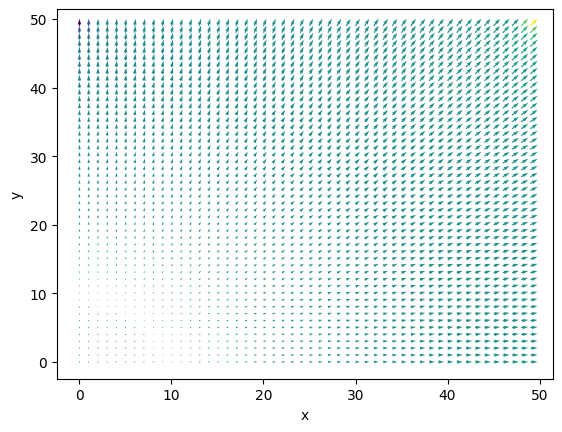

In [188]:
L = 1
N = 50
h = L/N
x = np.arange(N) * h
y = np.arange(N) * h
xp,yp = np.meshgrid(x,y)

E = np.empty((N,N))
for i in range(N):
    E[i,:] = - np.gradient(esp[i,:])
plt.quiver(xp,yp, E)
plt.xlabel('x')
plt.ylabel('y')